<img style="margin: 0 auto;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">

# Desafío 1: Determinantes del ingreso

#### Integrantes
* Catalina Cerda
* José González
* Luis Porras

## Enunciado

Usted trabaja para un  organismo no  gubernamental que está interesado en  las  dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el  Desarrollo.

Le encomiendan el  desarrollo de  un  modelo predictivo  sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en basea una serie de atributos sociodemográficos.

## Descripción de la base de datos:

Las variables que componen esta base se detallan a continuación:

*	`age`: Edad del individuo.
*	`workclass`: Naturaleza de la organización que emplea al individuo.
*	`education`: Nivel educacional del individuo.
*	`capital-gains`: Ingresos generados por inversiones fuera del trabajo.
*	`capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
*	`fnlwgt`: Ponderador muestral.
*	`marital-status`: Estado civil del individuo.
*	`occupation`: Ocupación del individuo.
*	`relationship`: Relación respecto a su familia.
*	`race`: Raza del encuestado.
*	`sex`: Sexo del encuestado.

## Aspectos adicionales a considerar (1.1)

* La base de datos contiene los valores perdidos como `?`.

In [1]:
# Librerias para procesamiento de Base de datos.
import pandas as pd
import numpy as np

# Librerías de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para Modelos de Clasificación:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#  Librería para inspeccionar visualizar datos N/A
import missingno as msgn

# Se importa la librería para ignorar los mensajes de advertencia 
import warnings
warnings.filterwarnings("ignore")

# Libreria funciones auxiliares
import herramientas_prueba

Primero leemos nuestra base de datos contenida en el archivo: `income-db.csv` y se revisarán algunos valores de la base de datos.

In [2]:
# Obtenemos la informacion de la base de datos.
df = pd.read_csv('income-db.csv')
# obtenemos las 5 primeras filas de nuestra base de datos:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Inspeccionamos nuestra base de datos
print(df.shape)

(48842, 15)


Nuestra base de datos contiene 15 columnas **(Variables)** y 48842 filas **(Datos)**.

Procedemos a remplazar los valores pérdidos `?` con `N/A`. Ya que es perferible para el análisis y visualización de nuestra base de datos.

In [4]:
# Reemplazo de valores perdidos:
df = df.replace('?', np.nan)

Inspeccion de nuestra Data:

In [5]:
## Inspeccionamos cada columna en búsqueda de datos perdidos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Según lo reportado anteriormente , las columnas **"workclass"**, **"occupation"**, y **"native-country"** tienen datos perdidos, ya que el número de variables es inferior a `48842`, el cual es el total de filas.

Inspeccionamos de forma visual la cantidad de valores perdidos:


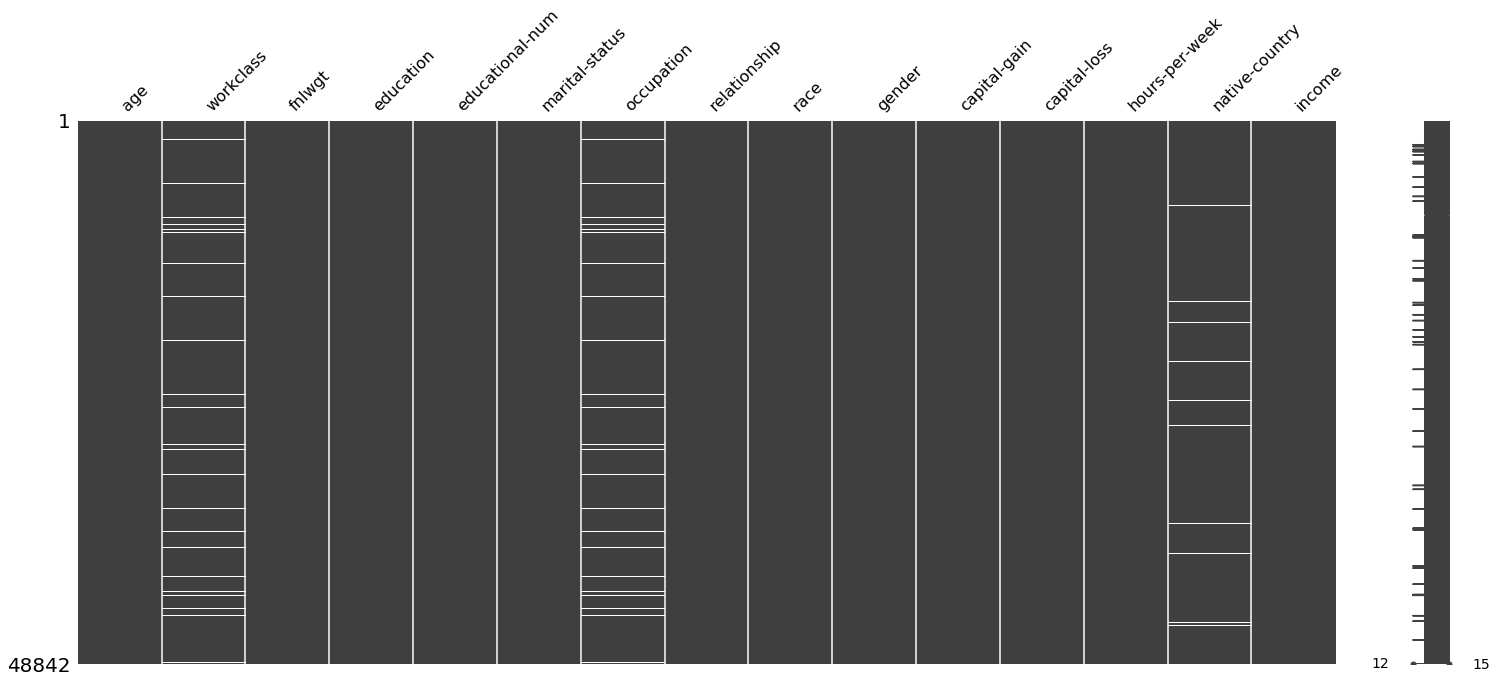

In [6]:
## se utiliza el método matrix de la librería missigno
msgn.matrix(df)

Tal como se ve en el gráfico anterior, la cantidad de datos perdidos se concentran en las columnas de **"Worclass"**, **"occupation"** y **"native-country"**.

In [7]:
# inspeccion cantidad de datos perdidos de la variable workclass
print(herramientas_prueba.get_missing_percent_info(df, 'workclass'))

El porcentaje de datos perdidos de la variable 'workclass' es: 5.73%


In [8]:
# inspeccion cantidad de datos perdidos de la variable occupation
print(herramientas_prueba.get_missing_percent_info(df, 'occupation'))

El porcentaje de datos perdidos de la variable 'occupation' es: 5.75%


In [9]:
# inspeccion cantidad de datos perdidos de la variable native-country
print(herramientas_prueba.get_missing_percent_info(df, 'native-country'))

El porcentaje de datos perdidos de la variable 'native-country' es: 1.75%


In [10]:
# Obtenemos el porcentaje total de datos perdidos:
print(herramientas_prueba.get_total_percent_of_nan_rows(df))

El porcentaje de datos perdidos si removemos todos los valores N/A es de: 92.59%


#####  Como los datos perdidos representan un poco más del 7% de la muestra consideramos que eliminarlos seria un error, por lo que optamos por dejarlos como valores nulos.

## Aspectos adicionales a considerar (1.2):

### Recodificar Variables:

* Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:
    * `workclass` debe recodificarse como `workclass_recod` siguiendo una nomenclatura similar a:
        * federal-gov $\leftarrow$ Federal-gov.
        * state-level-gov $\leftarrow$ State-gov, Local-gov.
        * self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc
        * unemployed $\leftarrow$ Never-worked, Without-pay.
    * `occupation` debe recodificarse como `collars` siguiendo una nomenclatura similar a:
        * white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.
        * blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving,Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
        * others $\leftarrow$ Other-service, Armed-Forces.
    * `education` debe recodificarse como `educ_recod` siguiendo una nomenclatura similar a:
        * preschool$\leftarrow$ Preschool
        * elementary-school$\leftarrow$ 1st-4th, 5th-6th
        * high-school$\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
        * college$\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
        * university$\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
    * `marital-status`  debe recodificarse como `civstatus`  siguiendo una  nomenclatura similar a:
        * married$\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
        * divorced$\leftarrow$ Divorced
        * separated$\leftarrow$ Separated
        * widowed$\leftarrow$ Widowed
    * `native-country` debe recodificarse como `region` donde cada país debe asignarse a uno de los 5 continentes
    * `income` debe recodificarse de forma binaria.

### Recodificacion de la variable `workclass` (Naturaleza de la organización que emplea al individuo):

* `workclass` debe recodificarse como `workclass_recod` siguiendo una nomenclatura similar a:
    * federal-gov $\leftarrow$ Federal-gov.
    * state-level-gov $\leftarrow$ State-gov, Local-gov.
    * self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc
    * unemployed $\leftarrow$ Never-worked, Without-pay.

Para ello veremos la cantidad de variables que se encuentran dentro de la columna.

In [11]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Luego recodificaremos todas las filas de dicha columna:

In [12]:
df['workclass'] = df['workclass'].replace([
    'Federal-gov',
    'State-gov', 'Local-gov',
    'Self-emp-inc', 'Self-emp-not-inc',
    'Never-worked', 'Without-pay'
],
[
    'federal-gov','state-level-gov', 'state-level-gov',
    'self-employed', 'self-employed', 'unemployed', 'unemployed'
])

Verificamos la recodificación:

In [13]:
df['workclass'].value_counts()

Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass, dtype: int64

### Inspección visual de la variable `workclass` (Naturaleza de la organización que emplea al individuo):

Dado que `workclass` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

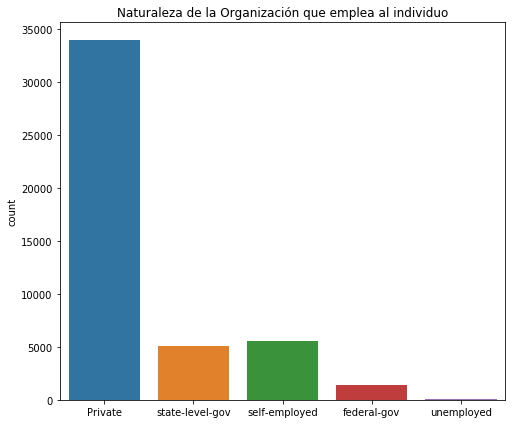

In [14]:
herramientas_prueba.visualize_rows(df.filter(['workclass']), 20, 6, 'Naturaleza de la Organización que emplea al individuo')

##### **Nota**:

Para el resto de columnas se hará un procedimiento parecido al anterior.

### Recodificacion de la Variable `occupation` (Ocupación del individuo):

* `occupation` debe recodificarse como `collars` siguiendo una nomenclatura similar a:
    * white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.
    * blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving,Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
    * others $\leftarrow$ Other-service, Armed-Forces

In [15]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
df['occupation'] = df['occupation'].replace([
    #white-collar
    'Prof-specialty', 'Exec-managerial', 'Adm-clerical','Sales','Tech-support',
    #blue-collar
    'Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners', 'Farming-fishing','Protective-serv','Priv-house-serv',
    #others
    'Other-service', 'Armed-Forces'
],
[   #white-collar
    'white-collar','white-collar','white-collar','white-collar', 'white-collar',
    #blue-collar
    'blue-collar', 'blue-collar', 'blue-collar','blue-collar', 'blue-collar', 'blue-collar', 'blue-collar',
    #others
    'others', 'others'
])

Luego verificamos la recodificación de las variables:

In [17]:
df['occupation'].value_counts()

white-collar    24819
blue-collar     16276
others           4938
Name: occupation, dtype: int64

### Inspección visual de la variable `Occupation` (Ocupación del individuo):

Dado que `occupation` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

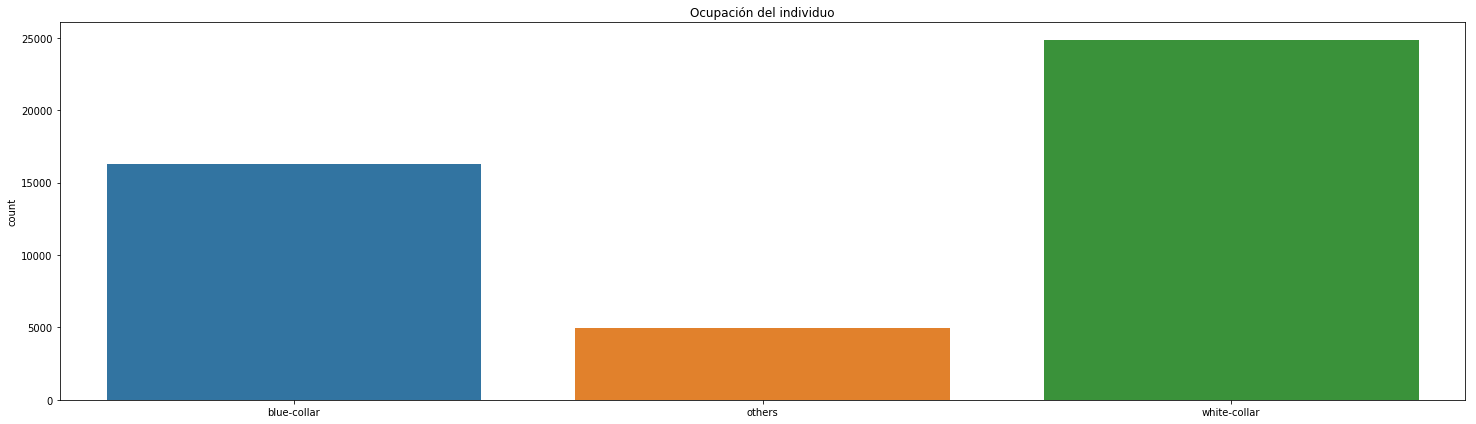

In [18]:
herramientas_prueba.visualize_rows(df.filter(['occupation']), 60, 6, 'Ocupación del individuo')

Podemos observar que la mayoria de individuos pertenecen a la categoría `white-collar`, es decir:

* Prof-specialty
* Exec-managerial
* Adm-clerical
* Sales
* Tech-support

El porcentaje menor en la gráfica corresponde a la categoría `others`, es decir:

* Other-service
* Armed-Forces

y el resto pertenecen a la categoría `blue-collar`, es decir:

* Craft-repair
* Machine-op-inspct
* Transport-moving
* Handlers-cleaners
* Farming-fishing
* Protective-serv
* Priv-house-serv.


### Recodificacion de la variable `education` (Nivel educacional del individuo):

* `education` debe recodificarse como `educ_recod` siguiendo una nomenclatura similar a:
    * preschool$\leftarrow$ Preschool
    * elementary-school$\leftarrow$ 1st-4th, 5th-6th
    * high-school$\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
    * college$\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
    * university$\leftarrow$ Bachelors, Masters, Prof-school, Doctorate

In [19]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [20]:
df['education'] = df['education'].replace([
    'Preschool',
    '1st-4th', '5th-6th',
    '7th-8th', '9th', '10th','11th', '12th', 'HS-grad',
    'Assoc-voc', 'Assoc-acdm', 'Some-college',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
],
[
    'preschool', 
    'elementary-school', 'elementary-school',
    'high-school', 'high-school', 'high-school','high-school', 'high-school', 'high-school',
    'college', 'college', 'college',
    'university', 'university', 'university', 'university'
])

Luego verificamos la recodificación de las variables:

In [21]:
df['education'].value_counts()

high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: education, dtype: int64

### Inspección visual de `education` (Nivel educacional del individuo):

Dado que `education` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

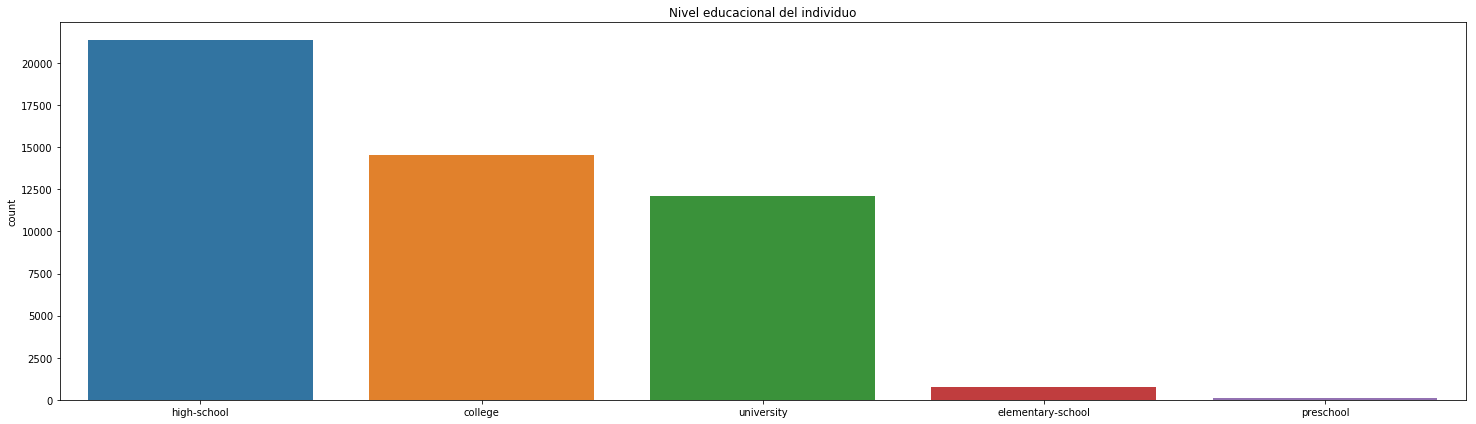

In [22]:
herramientas_prueba.visualize_rows(df.filter(['education']), 60, 6, 'Nivel educacional del individuo')

Del gráfico anterior podemos ver que el mayor porcentaje de encuestados pertenencen a la categoría `high-school`, es decir se encuentran en `Escuela secundaria`.

Además un gran porcentaje se encuentran entre las categorías `college` y `university`, es decir estan estudiando en la Universidad o ya se han graduado de una Universidad.

### Recodificacion de la variable `marital-status` (Estado civil del individuo):

* `marital-status`  debe recodificarse como `civstatus`  siguiendo una  nomenclatura similar a:
    * married$\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
    * divorced$\leftarrow$ Divorced
    * separated$\leftarrow$ Separated
    * widowed$\leftarrow$ Widowed

In [23]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [24]:
df['marital-status'] = df['marital-status'].replace([
    'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse',
    'Divorced',
    'Separated',
    'Widowed'
],
[
    'married','married', 'married',
    'divorced',
    'separated',
    'widowed'
])

In [25]:
df['marital-status'].value_counts()

married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: marital-status, dtype: int64

### Inspección visual de la variable `marital-status` (Estado civil del individuo):

Dado que `Estado civil del individuo` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

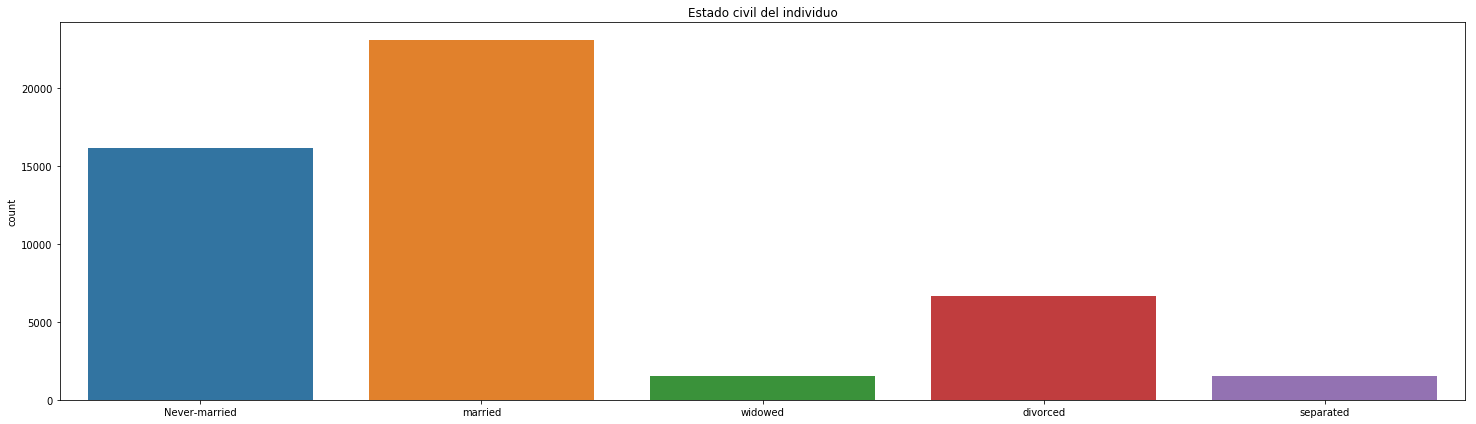

In [26]:
herramientas_prueba.visualize_rows(df.filter(['marital-status']), 60, 6, 'Estado civil del individuo')

Del gráfico anterior, podemos ver que la mayoría de los individuos de nuestra base de datos pertenecen a la categorias

`Never-married` y `Married-civ-spouse`, quiere decir que son: 'Soltero(a)s', o se han casado.

### Recodificacion de la Variable: (País de origen):

* `native-country` debe recodificarse como `region` donde cada país debe asignarse a uno de los 5 continentes

In [27]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [28]:
df['native-country'] = df['native-country'].replace ([
    # america
    'United-States', 'Peru', 'Guatemala', 'Mexico','Dominican-Republic',
    'El-Salvador', 'Puerto-Rico', 'Columbia', 'Cuba', 'Canada',
    'Nicaragua', 'Honduras','Jamaica','Ecuador', 'Haiti','Trinadad&Tobago',
    'Outlying-US(Guam-USVI-etc)',
    #europa
    'Ireland', 'Germany','Poland', 'England', 'Italy', 'Portugal',
    'Scotland', 'Yugoslavia', 'Hungary', 'Greece', 'France', 'Holand-Netherlands',
    #asia
    'Philippines', 'Thailand', 'Vietnam',
    'South', 'Japan', 'India', 'Cambodia', 'Laos', 'Taiwan', 'China',
    'Iran', 'Hong', 'Philippines'
],
[
    # america
    'america', 'america','america', 'america', 'america',
    'america', 'america', 'america', 'america', 'america',
    'america','america','america','america', 'america', 'america',
    'america',
    #europa
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    #asia
    'asia', 'asia', 'asia',
    'asia', 'asia', 'asia', 'asia', 'asia', 'asia', 'asia',
    'asia', 'asia', 'asia'
])

verificamos la recodificación de las variables:

In [29]:
df['native-country'].value_counts()

america    46109
asia        1096
europa       780
Name: native-country, dtype: int64

### Inspección visual de la variable `native-country` (País de Origen):

Dado que `País de Origen` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

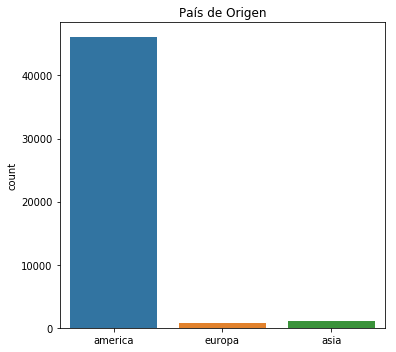

In [30]:
herramientas_prueba.visualize_rows(df.filter(['native-country']), 15, 5, 'País de Origen')

Podemos ver que la gran mayoría de los individuos de nuestra base de datos se encuentra ubicado en la region **América**.

### Recodificacion de Income (Ingresos):

 - `income`: `<=50K` Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, `>50K` si el individuo percibe ingresos superiores a 50.000 dólares anuales.
 
**Siendo este nuestro vector objetivo**, debe recodificarse de forma binaria, dado que solo contiene 2 valores posíbles.

In [31]:
# comprobamos que los datos pertenezcan a dichas categorías.
df['income'].value_counts('%')

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

### Inspeccion Visual de la variable `income` (Ingresos):

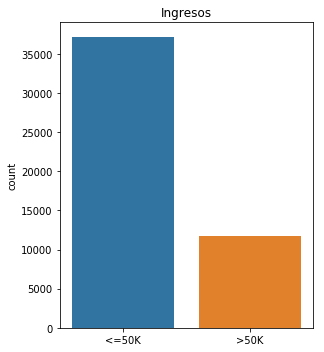

In [32]:
herramientas_prueba.visualize_rows(df.filter(['income']), 12, 5, 'Ingresos')

De el gráfico anterior, podemos inferir que la mayor candidad de los individuos de nuestra base de datos tiene ingresos
menores iguales a `$50.000` anual.  **Esto sin tener encuenta otras variables.**

Luego lo binarizamos utilizando el criterio mencionado anteriormente:

In [33]:
df['original_income'] = df['income'].copy()
# Haciendo uso del módulo Numpy y la función where.
df['income'] = np.where(df['income'] == '>50K', 1, 0)
df['income_usd'] = np.where(df['original_income'] == '>50K', 50.000, - 50.000)

Verificamos la binarización de nuestro **vector objetivo**:

In [34]:
df['income'].value_counts('%')

0    0.760718
1    0.239282
Name: income, dtype: float64

### Renombrando las columnas:

Finalmente debemos renombrar el nombre de las columnas

In [35]:
# Renombramos sólo las columnas que cambian.
df = df.rename(columns={
    'workclass': 'workclass_recod',
    'occupation': 'collars',
    'education': 'educ_recod',
    'marital-status': 'civstatus',
    'native-country': 'region'
})

Tomamos una muestra aleatoria de 5 individuos, para verificar las variables y datos:

In [36]:
# retorna 5 items de la base de datos aleatoriamente.
df.sample(5)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income,original_income,income_usd
783,25,Private,189334,high-school,7,married,blue-collar,Husband,White,Male,0,0,40,america,0,<=50K,-50.0
32328,18,Private,188241,high-school,7,Never-married,others,Own-child,White,Male,0,0,16,america,0,<=50K,-50.0
11809,33,Private,342458,high-school,9,Never-married,blue-collar,Not-in-family,White,Male,0,0,40,america,0,<=50K,-50.0
43530,28,Private,51961,college,10,Never-married,white-collar,Own-child,Black,Male,0,0,24,america,0,<=50K,-50.0
15500,22,federal-gov,277700,college,10,Never-married,white-collar,Own-child,White,Male,0,0,20,america,0,<=50K,-50.0


## Modelación:

**Elementos a considerar**:

* La modelación mediante regresión.
* La interpretación de los principales regresores.
* La definición de las estrategias de Modelación predictiva.

Debido a a que nuestro vector objetivo es la variable `income` (Ingresos) y dicha variable es binaria, entonces se opta por una clasificación.

**Implementaremos Regresión Logistica**:

Necesitamos un **modelo predictivo** sobre la probabilidad de que un individuo presente salarios por sobre o bajo los `$50.000` dolares anuales en base a los atributos **socio-demográficos**:

-	`age`:  Edad
-   `workclass_recod`: Naturaleza de la organización que emplea al individuo
-	`education`: Nivel educacional del individuo.
-	`civstatus`: Estado civil del individuo
-	`collars`: Profesion.
-	`relationship`: Relación respecto a su familia
-	`race`: Raza del encuestado
-	`sex`: Sexo del encuestado
-	`hours-per-week`: Horas a la semana
-	`region`:  País de origen

Primero implementaremos un **modelo saturado**:

$$
log\left(\frac{p(x)}{1-p(x)} \right) = \beta_{0} + \beta_{1} \times age + \beta_{2} \times region
+ \beta_{3} \times collar + \beta_{4} \times civstatus + \beta_{5} \times race
$$

Se procede a graficar la variable independiente **age (Edad)**.

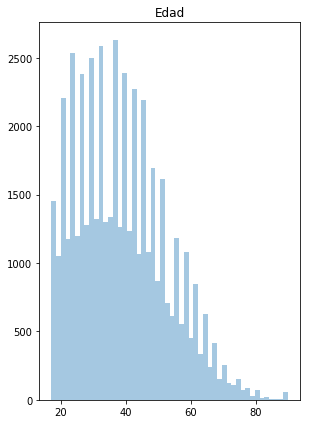

In [37]:
herramientas_prueba.visualize_rows(df.filter(['age']), 12, 6, 'Edad')

La gráfica de nuestra variable **age (Edad)**: Sugiere un comportamiento cercano a la distribución normal.

#### Graficaremos la variable independiente `hours-per-week` (Horas por semana):

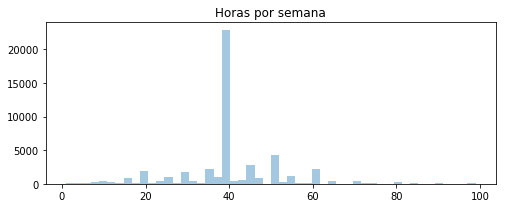

In [38]:
herramientas_prueba.visualize_rows(df.filter(['hours-per-week']), 20, 3, 'Horas por semana')

Podemos análizar visualmente de la gráfica anterior que la variable **hours-per-week**:
    * Tiene como mayor valor frecuente 40 horas a la semana.
    * Podemos observar que el 50% de los individuos trabajan menos de 40 horas a la semana y el otro 50% trabajan más
    de 40 horas a la semana.
    * Además el promedio de total de horas laboradas tiende a 40 horas.

Esto lo podemos corroborar calculando la Mediana, Media y Moda:

In [39]:
print(f"La mediana de la variable horas a la semana es de: {df['hours-per-week'].median()}")
print(f"La moda de horas a la semana es de: {df['hours-per-week'].mode()[0]}")
print(f"El valor promedio de horas a la semana es de: {round(df['hours-per-week'].mean(), 2)}")

La mediana de la variable horas a la semana es de: 40.0
La moda de horas a la semana es de: 40
El valor promedio de horas a la semana es de: 40.42


In [40]:
df.head(1)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income,original_income,income_usd
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,america,0,<=50K,-50.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
age                48842 non-null int64
workclass_recod    46043 non-null object
fnlwgt             48842 non-null int64
educ_recod         48842 non-null object
educational-num    48842 non-null int64
civstatus          48842 non-null object
collars            46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
region             47985 non-null object
income             48842 non-null int64
original_income    48842 non-null object
income_usd         48842 non-null float64
dtypes: float64(1), int64(7), object(9)
memory usage: 6.3+ MB


In [42]:
# Renombramos sólo la columna hours-per-week.
df = df.rename(columns={
    'hours-per-week': 'hours_per_week',
})

In [43]:
df.head(0)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours_per_week,region,income,original_income,income_usd


In [44]:
modelo_logit = smf.logit('income ~ age + region + collars + civstatus + race + hours_per_week', df).fit()

Optimization terminated successfully.
         Current function value: 0.402349
         Iterations 7


In [45]:
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                           14
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                  0.2815
Time:                        14:39:42   Log-Likelihood:                -18195.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -6.7003      0.182    -36.817      0.000      -7.057      -6.344
region[T.asia]                -0.1561      0.134     -1.168      0.243      -0.418       0.106
region[T.europa]               0.1434      0.096      1.491      0.136      -0.045       0.332
collars[T.others]             -0.7774      0.080     -9.713      0.000      -0.934      -0.621
collars[T.white-collar]        1.3186      0.029     45.874      0.000       1.262       1.375
civstatus[T.divorced]          0.3197      0.060      5.324      0.000       0.202       0.437
civstatus[T.married]           2.4587      0.045     54.949      0.000       2.371       2.546
civstatus[T.separated]         0.2058      0.115      1.790      0.073      -0.019       0.431
civstatus[T.widowed]           0.0707      0.111      0.637      0.524      -0.147       0.289
race[T.Asian-Pac-Islander]     0.8410      0.203      4.141      0.000       0.443       1.239
race[T.Black]                  0.3859      0.172      2.240      0.025       0.048       0.724
race[T.Other]                  0.2149      0.243      0.885      0.376      -0.261       0.691
race[T.White]                  0.6887      0.164      4.189      0.000       0.366       1.011
age                            0.0264      0.001     22.905      0.000       0.024       0.029
hours_per_week                 0.0348      0.001     29.845      0.000       0.033       0.037
==============================================================================================
"""

Segun lo reportado por nuestro modelo, las variables con significancia estadística al 95% son: `age`, `collars`, `civstatus`, `race`, `hours_per_week`

Nuestro modelo podría ser depurado a:

In [46]:
modelo_logit = smf.logit('income ~ age + collars + civstatus + race + hours_per_week', df).fit()

Optimization terminated successfully.
         Current function value: 0.402908
         Iterations 7


In [47]:
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                46033
Model:                          Logit   Df Residuals:                    46020
Method:                           MLE   Df Model:                           12
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                  0.2809
Time:                        14:39:43   Log-Likelihood:                -18547.
converged:                       True   LL-Null:                       -25791.
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -6.6914      0.182    -36.850      0.000      -7.047      -6.336
collars[T.others]             -0.7672      0.078     -9.788      0.000      -0.921      -0.614
collars[T.white-collar]        1.3154      0.028     46.184      0.000       1.260       1.371
civstatus[T.divorced]          0.3091      0.059      5.198      0.000       0.193       0.426
civstatus[T.married]           2.4445      0.044     55.416      0.000       2.358       2.531
civstatus[T.separated]         0.1741      0.115      1.518      0.129      -0.051       0.399
civstatus[T.widowed]           0.0498      0.111      0.451      0.652      -0.167       0.266
race[T.Asian-Pac-Islander]     0.7116      0.179      3.986      0.000       0.362       1.061
race[T.Black]                  0.3839      0.172      2.232      0.026       0.047       0.721
race[T.Other]                  0.1699      0.240      0.709      0.478      -0.300       0.640
race[T.White]                  0.6932      0.164      4.217      0.000       0.371       1.015
age                            0.0266      0.001     23.296      0.000       0.024       0.029
hours_per_week                 0.0347      0.001     30.101      0.000       0.032       0.037
==============================================================================================
"""

In [48]:
# Imprimiendo log_odds y probabilidad:
herramientas_prueba.print_logit_estimations(modelo_logit, 'ingreso superior o igual a $50.0000 dólares anual')

Estimate_odds: -1.1458718349891037
La probabilidad para un individuo con las variables suministradas en el modelo de tener un ingreso superior o igual a $50.0000 dólares anual es de: 24.124%


**Nota**:  Podemos seguir depurando el modelo si binarizamos algúnas variables como `collars`, `civstatus`, y `race`

In [49]:
df_copy = herramientas_prueba.binarize_columns(df, ['collars', 'civstatus', 'race'])

Analizando Datos de la variable: collars
white-collar    24819
blue-collar     16276
others           4938
Name: collars, dtype: int64
El valor más frecuente tiene: 24819 registros
El valor más frecuente es: white-collar
Analizando Datos Binarizados de la variable: collars
0    24819
1    24023
Name: b_collars, dtype: int64
Analizando Datos de la variable: civstatus
married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: civstatus, dtype: int64
El valor más frecuente tiene: 23044 registros
El valor más frecuente es: married
Analizando Datos Binarizados de la variable: civstatus
1    25798
0    23044
Name: b_civstatus, dtype: int64
Analizando Datos de la variable: race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64
El valor más frecuente tiene: 41762 registros
El valor más frecuente es: White
Analizando Dat

In [50]:
# revisamos una muestra aleatoria de 5.
df_copy.sample(5)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours_per_week,region,income,original_income,income_usd,b_collars,b_civstatus,b_race
39463,59,self-employed,128105,high-school,9,married,blue-collar,Husband,White,Male,0,0,35,america,0,<=50K,-50.0,1,0,0
9434,17,Private,86019,high-school,7,Never-married,white-collar,Not-in-family,White,Female,0,0,36,america,0,<=50K,-50.0,0,1,0
278,58,self-employed,204021,university,13,married,blue-collar,Husband,White,Male,15024,0,50,america,1,>50K,50.0,1,0,0
20196,51,Private,186338,high-school,9,married,blue-collar,Husband,White,Male,0,0,40,america,1,>50K,50.0,1,0,0
16152,47,state-level-gov,244813,high-school,9,married,white-collar,Husband,White,Male,0,0,40,america,0,<=50K,-50.0,0,0,0


In [51]:
modelo_logit = smf.logit('income ~ age + b_collars + b_civstatus + b_race + hours_per_week', df_copy).fit()

Optimization terminated successfully.
         Current function value: 0.394988
         Iterations 7


In [52]:
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48836
Method:                           MLE   Df Model:                            5
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                  0.2822
Time:                        14:39:43   Log-Likelihood:                -19292.
converged:                       True   LL-Null:                       -26875.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.2745      0.072    -31.701      0.000      -2.415      -2.134
age                0.0273      0.001     26.599      0.000       0.025       0.029
b_collars         -1.4221      0.027    -53.221      0.000      -1.474      -1.370
b_civstatus       -2.3513      0.031    -75.857      0.000      -2.412      -2.291
b_race            -0.2794      0.041     -6.846      0.000      -0.359      -0.199
hours_per_week     0.0352      0.001     32.110      0.000       0.033       0.037
==================================================================================
"""

In [53]:
# Imprimiendo log_odds y probabilidad:
herramientas_prueba.print_logit_estimations(modelo_logit, 'ingreso superior o igual a $50.0000 dólares anual')

Estimate_odds: -6.264696637558743
La probabilidad para un individuo con las variables suministradas en el modelo de tener un ingreso superior o igual a $50.0000 dólares anual es de: 0.19%


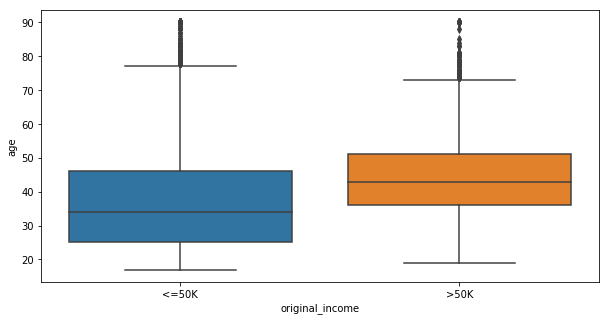

In [54]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot(x=df['original_income'], y=df['age'])

En el gráfico anterior podemos corroborar el efecto que tiene la variable `age` sobre la variable `income`.

In [55]:
modelo_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.282     
Dependent Variable: income           AIC:              38596.0289
Date:               2019-09-21 14:39 BIC:              38648.8070
No. Observations:   48842            Log-Likelihood:   -19292.   
Df Model:           5                LL-Null:          -26875.   
Df Residuals:       48836            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -2.2745   0.0717 -31.7014 0.0000 -2.4151 -2.1338
age               0.0273   0.0010  26.5989 0.0000  0.0253  0.0294
b_collars        -1.4221   0.0267 -53.2213 0.0000 -1.4744 -1.3697
b_civstatus      -2.3513   0.0310 -75.8568 0.0000 -2.4120 -2.2905
b_race           -0.2794   0.0408  -6.8459 0.0000 -0.3594 -0.1994
hours_per_week    0.0352   0.0011  32.1101 0.0000  0.0330  0.0373
=================================================================

"""

### Graficaremos la Curva ROC

La gráfica de Curva ROC nos ayudará para saber el desempeño de nuestro modelo y además poder visualizar
los verdaderos positivos y los falsos positivos

In [56]:
# matriz de variables independiente de nuestro modelo
independent_vars = df_copy.loc[:, ['age', 'b_collars', 'b_civstatus', 'b_race', 'hours_per_week']]

In [57]:
# realizamos una separación de nuestra data para predecir valores de nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(
    independent_vars,
    df_copy['income'],
    test_size=0.33,
    random_state=21092019
)

In [58]:
# estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)

# estandarizamos la matriz de validación
X_test_std = StandardScaler().fit_transform(X_test)

In [59]:
# Iniciamos un modelo de regresion logistica y le pasamos los datos en fit
default_model = LogisticRegression().fit(X_train_std, y_train)

In [60]:
default_model.coef_

array([[ 0.3701322 , -0.71659272, -1.1702195 , -0.10041315,  0.42837051]])

Podemos ver que los coeficientes se asemejan a los coeficientes de nuestro modelo inicial de clasificación.

In [61]:
modelo_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.282     
Dependent Variable: income           AIC:              38596.0289
Date:               2019-09-21 14:39 BIC:              38648.8070
No. Observations:   48842            Log-Likelihood:   -19292.   
Df Model:           5                LL-Null:          -26875.   
Df Residuals:       48836            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -2.2745   0.0717 -31.7014 0.0000 -2.4151 -2.1338
age               0.0273   0.0010  26.5989 0.0000  0.0253  0.0294
b_collars        -1.4221   0.0267 -53.2213 0.0000 -1.4744 -1.3697
b_civstatus      -2.3513   0.0310 -75.8568 0.0000 -2.4120 -2.2905
b_race           -0.2794   0.0408  -6.8459 0.0000 -0.3594 -0.1994
hours_per_week    0.0352   0.0011  32.1101 0.0000  0.0330  0.0373
=================================================================

"""

En la tabla anterior podemos visualizar con mayor detalle las metricas de nuestro modelo, como lo son
el Pseudo R-squared.

Ahora reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.

In [62]:
yhat = default_model.predict_proba(X_test)[:, 1]
print(yhat)

[1. 1. 1. ... 1. 1. 1.]


#### generamos los objetos de roc_curve:

In [63]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

#### Por útimo graficamos la Curva ROC del modelo:

Text(0.5, 0, 'Falsos Positivos')

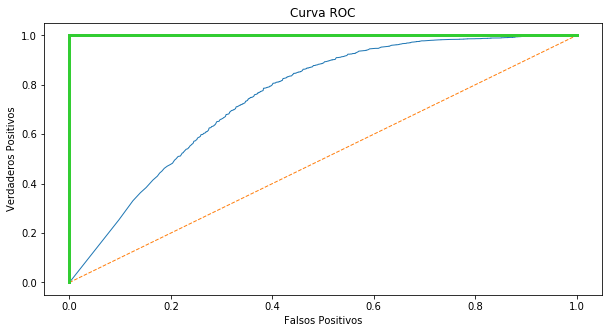

In [64]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

En el gráfico anterior podemos ver que nuestro modelo predictivo está por encima de la bisectriz, por lo tanto,
podemos decir que tiene un buen desempeño.